In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
class pages:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.page_id=self.get_ids(d)
        self.title_part1=self.get_title_part1(d)
        self.title_part2=self.get_title_part2(d)
        self.short_description=self.get_short_description(d)
        self.description=self.get_description(d)
        self.create_df()
    
    def get_ids(self, x):
        res=[]
        for i in range(len(x)):
            res.append(int(x[i]["id"]))
        return res
    
    def get_title_part1(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part1"])
        return res
    
    def get_title_part2(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def get_short_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description_short"])
        return res
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def create_df(self):
        dd={}
        dd["page_id"]=self.page_id
        dd["title_part1"]=self.title_part1
        dd["title_part2"]=self.title_part2
        dd["short_description"]=self.short_description
        dd["description"]=self.description
        self.df=pd.DataFrame(dd)

In [3]:
page=pages("page.json", "page")
page_df=page.df

In [4]:
page_df.head()

,page_id,title_part1,title_part2,short_description,description
0,3257,Expert Advice on Creating,The Ideal CV Layout,The importance of the CV layout cannot be unde...,<p>The importance of your&nbsp;CV layout canno...
1,2693,Linda Jones on,Female Diversity,Linda Jones speaks about the Sky initiative to...,<p>Linda Jones discusses Project Sky and outli...
2,3405,Sector:,Accounting & Finance,Apply for accounting & finance internships at ...,<h1><em>Which&nbsp;location do you want to wor...
3,233,Top Skills to Excel,In the Technology Sector,,<p>You don&#39;t have to be a world class prog...
4,87,Top Five Tips for,Creating a Successful Brand,,<p>There are misconceptions about how importan...


In [5]:
page_df.shape

(2529, 5)

In [6]:
content=page_df["description"].values

In [7]:
part_1=page_df["title_part1"].values

In [8]:
part_2=page_df["title_part2"].values

In [9]:
title=[]
for i in range(len(part_1)):
    title.append(part_1[i]+" "+part_2[i])

In [10]:
short_description=page_df["short_description"].values

In [11]:
def remove_pages(content):
    res=True
    if len(content)<10:
        res=False
    return res

In [12]:
def clean_page(title, content):
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&amp;","").replace("&middot;","")
    content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
    content=re.sub('<.*?>',"  ",content , flags=re.DOTALL)
    res=title+"\r\n "+content
    res=res.replace("(","").replace(")","")
    res=res.replace("&rsquo","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    return res

In [13]:
data=[clean_page(title[i], content[i]) for i in range(len(content))]

In [14]:
len(data)

2529

In [15]:
data=[i for i in data if remove_pages(i)]

In [16]:
len(data)

2465

In [17]:
data[0]

'Expert Advice on Creating The Ideal CV Layout\r\n   The importance of your CV layout cannot be understated Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n     Get those notepads ready\r\n\r\n             Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form   Here   '

In [18]:
class jobs:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["job_description"]=self.description
        dd["job_title"]=self.title
        self.df=pd.DataFrame(dd)

In [19]:
job=jobs("job.json", "job")
job_df=job.df

In [20]:
job_df.head()

,job_description,job_title
0,<h2>Overview</h2>\r\n\r\n<p>We are recruiting ...,Systems Engineer Graduate
1,<p>Slaughter and May is one of the most presti...,Training contract
2,"<p>As a Future Leader, you?ll get an unparalle...",Summer Placements
3,<h2>Internships at our international headquart...,International Internship Programme
4,<h2>Description</h2>\r\n\r\n<p>Our Electronics...,Graduate Electronics & Robotics Engineers


In [21]:
job_title=job_df["job_title"].values
job_description=job_df["job_description"].values

In [22]:
def clean_job(title, content):
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
    content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
    content=re.sub('<.*?>',"  ",content , flags=re.DOTALL)
    res=title+"\r\n "+content
    res=res.replace("(","").replace(")","")
    res=res.replace("&rsquo","").replace("\t","").replace("&ndash;","").replace("\r\n\r\n"," ").replace(" \r\n ","")
    return res

In [23]:
job_data=[clean_job(job_title[i], job_description[i]) for i in range(len(job_description))]

In [24]:
len(job_data)

3954

In [25]:
job_data=[i for i in job_data if remove_pages(i)]

In [26]:
len(job_data)

3954

In [27]:
d=pd.read_csv("data.csv")

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,12,13,14,15,17,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
d.head()

,Unnamed: 0,user_id,job_created_date,job_application_status,job_id,employer_id,job_opening_date,job_closing_date,job_short_description,job_description,...,course_includes_industrial_placement,graduation_year,right_to_work_uk,degree_subject_id,university_id,university_name,university_type,degree_subject_name,degree_subjectgroup_id,degree_subjectgroup_title
0,0,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
1,11,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
2,10,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
3,9,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
4,23304,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management


In [29]:
employer_title=d['employer_title'].values
employer_description=d["employer_description"].values
employer_sector=d["employer_sector_title"].values

In [30]:
def clean_employer(title, content, sector):
    try:
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
        content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
        content=re.sub('<.*?>',"  ",content , flags=re.DOTALL)
        res=title+"\r\n "+sector+"\r\n "+content 
        res=res.replace("(","").replace(")","").replace("&ndash;","").replace("\r\r\n\r\r\n","").replace("\r\r\n","")
        res=res.replace("&rsquo;","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    except:
        res=""
    return res

In [31]:
employer_data=[clean_employer(employer_title[i], employer_description[i], employer_sector[i]) for i in range(len(employer_description))]

In [32]:
employer_data=[i for i in employer_data if remove_pages(i)]

In [33]:
employer_data = list(set(employer_data))

In [34]:
len(employer_data)

829

In [35]:
class success_story:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def create_df(self):
        dd={}
        dd["success_description"]=self.description
        dd["success_title"]=self.title
        self.df=pd.DataFrame(dd)

In [36]:
story=success_story("success_story.json","success_story")
story_df=story.df

In [37]:
story_df.head()

,success_description,success_title
0,<p>Huge congratulations to Nathan who has secu...,Nathan on securing a role with Amazon
1,"<p>This summer, Cambridge student Carmen, will...",Summer Internship at Goldman Sachs
2,<p>We recently caught up with KCL graduate and...,Aysha secures Graduate Role at Deloitte
3,<h2>First things first</h2>\r\n\r\n<p>&middot;...,Commercial Banking - Mid-Markets & SME
4,<p>We caught up with Bright Network member Che...,Life as a consultant at Accenture


In [38]:
story_title=story_df["success_title"].values
story_description=story_df["success_description"].values

In [39]:
def clean_story(title, content):
    try:
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
        content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
        content=re.sub('<.*?>',"  ",content , flags=re.DOTALL)
        res=title+"\r\n "+content 
        res=res.replace("(","").replace(")","").replace("&ndash;","").replace("\r\r\n\r\r\n","").replace("\r\r\n","")
        res=res.replace("&rsquo;","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    except:
        res=""
    return res

In [40]:
story_data=[clean_story(story_title[i], story_description[i]) for i in range(len(story_description))]

In [41]:
len(story_data)

486

In [42]:
class event:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["event_description"]=self.description
        dd["event_title"]=self.title
        self.df=pd.DataFrame(dd)

In [43]:
ev=event("event.json","event")
event_df=ev.df

In [44]:
event_description=event_df["event_description"].values
event_title=event_df["event_title"].values

In [45]:
def clean_event(title, content):
    try:
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
        content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
        content=re.sub('<.*?>',"  ",content , flags=re.DOTALL)
        res=title+"\r\n "+content 
        res=res.replace("(","").replace(")","").replace("&ndash;","").replace("\r\r\n\r\r\n","").replace("\r\r\n","")
        res=res.replace("&rsquo;","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    except:
        res=""
    return res

In [46]:
event_data=[clean_event(event_title[i], event_description[i]) for i in range(len(event_description))]

In [47]:
len(event_data)

291

In [48]:
event_data[0]

"Finance Master's Courses Online Information Session\r\n   Looking to find out how you can accelerate your career with an exceptional masters programme at this UK top four business school\r\n This Online Information Session hosted by Associate Dean Dr Nick Motson will focus on finance group of masters courses:    MSc in Banking International Finance  MSc in Corporate Finance  MSc in Finance  MSc in International Accounting Finance  MSc in Investment Management    Apply today for your chance to find out how Cass Business Schools masters programmes can give you the competitive edge\r\n   "

In [49]:
test=pd.read_csv("data job posts.csv")

In [50]:
job_posts=test["jobpost"].values

In [51]:
job_posts[550]

'Advanced Social Technologies\r\nTITLE:  Program Assistant/Office Manager\r\nTERM:  Full-time\r\nSTART DATE/ TIME:  15 September 2004\r\nLOCATION:  Yerevan, Armenia\r\nJOB DESCRIPTION:  Advanced Social Technologies (AST), an independent\r\ncenter for sociological research and social engineering seeks a\r\nfull-time Program Assistant/Office Manager\r\nJOB RESPONSIBILITIES:  \r\n1. Program assistance\r\n- Desk research\r\n- Armenian-English and English-Armenian translation\r\n- Editorial support\r\n- Typewriting\r\n2. Office management\r\n- Contact management\r\n- Correspondence\r\n- Employee database management\r\n- Acquisition and maintenance of office supplies\r\nREQUIRED QUALIFICATIONS:\r\n- University degree, preferably in social sciences\r\n- Relevant work experience\r\n- Excellent knowledge of working English and Armenian languages\r\n- Profficiency in MS Office (Word, Excel, MS Outlook)\r\n- Internet surfing skills\r\nPersonal qualifications\r\n- Accuracy and punctuality\r\n- Abi

In [52]:
def clean_job_posts(x):
    res=""
    a=x.split("\r\n")
    n=len(a)
    while n>0:
        for i,sentence in enumerate(a):
            if len(sentence)>5:
                if sentence[0].islower():
                    a[i-1]=a[i-1]+" "+sentence
                    a.remove(sentence)
                    break
            else:
                a.remove(sentence)
                break
        n=n-1
    for i in a:
        res+=i+"\r\n "
    res=res.replace("--","").replace("..","")
    res=res.replace(".","")
    return res

In [53]:
job_posts_data=[clean_job_posts(job_posts[i]) for i in range(len(job_posts))]
job_posts_data=job_posts_data[9000:]

In [54]:
len(job_posts_data)

10001

In [55]:
job_posts_data[550]

'Project HOPE Armenia\r\n TITLE:  Accountant\r\n TERM:  Part-time\r\n LOCATION:  Yerevan, Armenia\r\n JOB DESCRIPTION:  The Accountant will ensure timely and accurate reporting on financial transactions by organizing, implementing and execution of accounting procedures in accordance with Project HOPE and national legislation requirements\r\n JOB RESPONSIBILITIES:\r\n - Maintain and control bank accounts; handle cash remittances, bank withdrawals and currency conversions;\r\n - Process expenditures and payments in the accounting software (local accounting system), calculate salaries and relevant taxes, maintain timesheets, accrued vacation and sick leave records;\r\n - Ensure that all transactions are adequately supported and documented in accordance with the Project HOPE policy, donor requirements and local legislation;\r\n - Keep assets inventory in accordance with the local legislation and PH policy;\r\n - Prepare monthly/quarterly/annual financial, tax and other relevant reports for

In [56]:
all_data=data+job_data+employer_data+story_data+event_data

In [57]:
len(all_data)

8025

In [58]:
all_data=[i for i in all_data if len(i)>10]

In [59]:
all_data[:3]

['Expert Advice on Creating The Ideal CV Layout\r\n   The importance of your CV layout cannot be understated Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n     Get those notepads ready\r\n\r\n             Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form   Here   ',
 'Linda Jones on Female Diversity\r\n   Linda Jones discusses Project Sky and outlines how Pinset Masons are introducing initiatives to address the gender imbalance in the corporate world\r\n           ',
 'Sector: Accounting & Finance\r\n     Which location do you want to work in           LONDON -   click here      MANCHESTER -   click here      BRISTOL -   click here

In [60]:
def remove_stopwords(x):
    res=[]
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,document in enumerate(x):
        sentences=document.split("\r\n")
        new_sentences=[]
        for sentence in sentences:
            words=sentence.split(" ")
            try:
                lk=''
                while True:
                    words.remove(lk)
            except:
                pass
            if len(words)>1:
                new_words=[]
                for word in words:
                    word=word.lower()
                    if word not in stop:
                        new_words.append(word)
                a=""
                for l,k in enumerate(new_words):
                    if l<len(new_words):
                        a+=k+" "
                    else:
                        a+=k
                a+="\r\n "
                new_sentences.append(a)
        b=""
        for k in new_sentences:
            b+=k
        res.append(b)
    return res

In [61]:
documents=remove_stopwords(all_data)

In [62]:
documents[0]

'expert advice creating ideal cv layout \r\n importance cv layout understated making cv visually impactful vital information contains \r\n however understand time consuming tricky ordeal \r\n luckily head marketing ben triggs hand take whirlwind detailed tour \r\n get notepads ready \r\n employers just request cv \r\n sometimes application form required means adopting different approach \r\n find stand employer application form \r\n '

# Word2vec

In [63]:
def get_data_word2vec(x):
    res=[]
    for document in x:
        sentences=document.split("\r\n")
        for sentence in sentences:
            sentence=sentence.replace("&pound;","").replace("We;re","").replace(";"," ")
            sentence=sentence.replace("We;ll","").replace(":"," ").replace("&quot;","")
            sentence = ''.join([i for i in sentence if not i.isdigit()])
            a=sentence.split(" ")
            try:
                lk=''
                while True:
                    a.remove(lk)
            except:
                pass
            res.append(a)
    return res

In [64]:
sentences=get_data_word2vec(documents)

In [66]:
def create_corpus_file(path, x):
    with open(path, 'w', encoding="UTF-8") as f:
        for item in x:
            a=""
            for i in item:
                a+=i+" "
            a+="\n"
            f.write(a)

In [67]:
create_corpus_file("corpus.txt", sentences)

In [68]:
model = Word2Vec(sentences, min_count=5, size=150,
        window=5,
        workers=10)

In [69]:
model.train(sentences, total_examples=len(sentences), epochs=20)

(37662064, 39845460)

In [70]:
print(model)

Word2Vec(vocab=13192, size=150, alpha=0.025)


In [71]:
words = list(model.wv.vocab)

In [72]:
model.save('model.bin')

In [73]:
#model = Word2Vec.load('model.bin')

# Visualisation

In [74]:
X = model[model.wv.vocab]

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [75]:
X.shape

(13192, 150)

In [76]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [77]:
print(pca.explained_variance_ratio_)

[0.04239383 0.03955866]


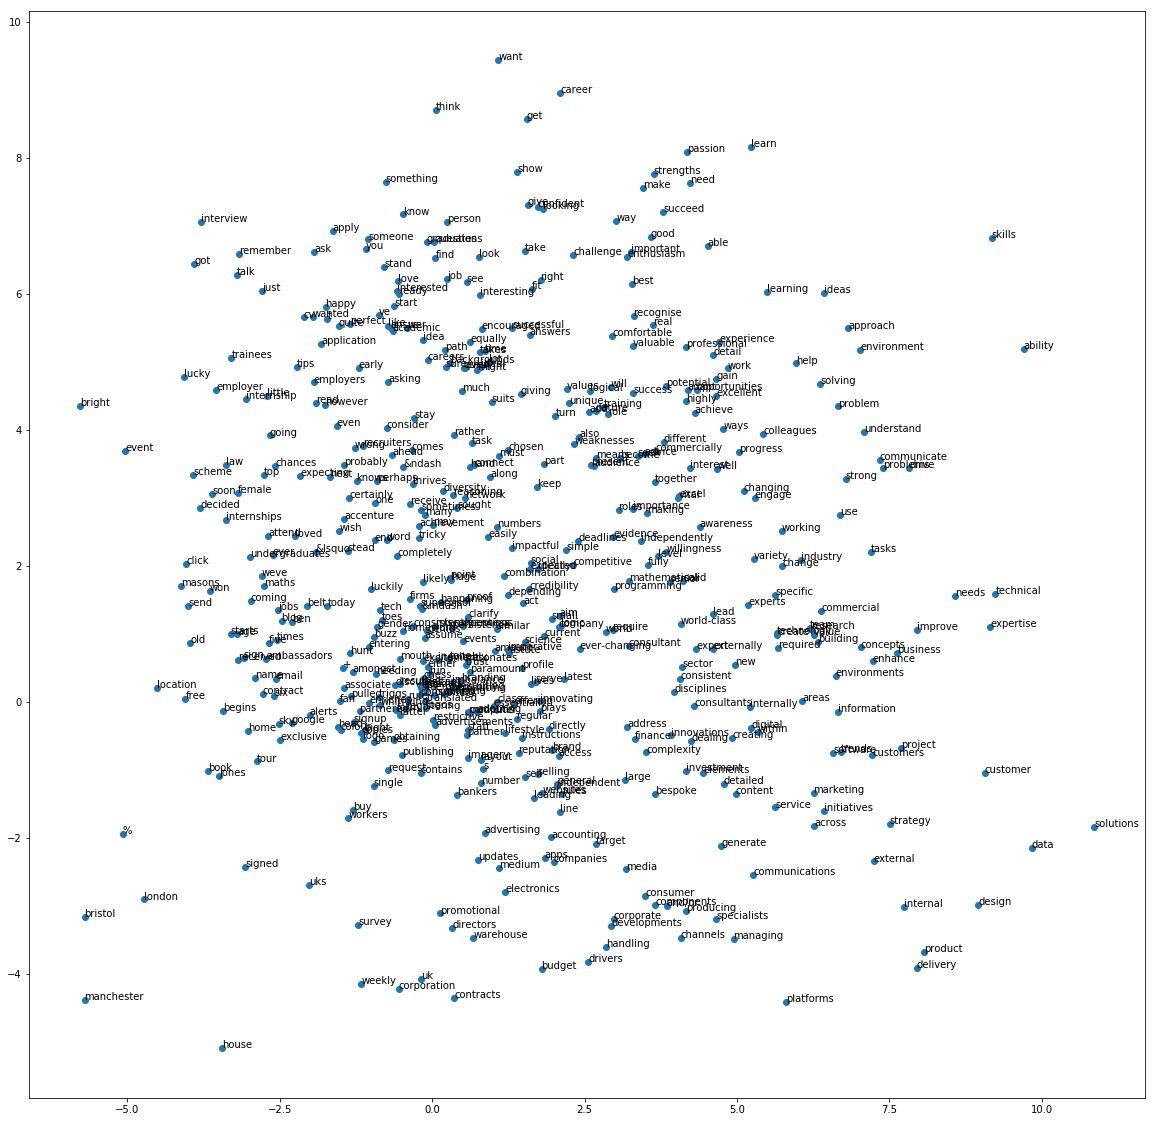

In [78]:
k=500
plt.figure(figsize=(20,20))
plt.scatter(result[:k, 0], result[:k, 1])
for i, word in enumerate(words[:k]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [79]:
model.wv.most_similar(positive="job")

[('role', 0.5272299647331238),
 ('position', 0.4239368438720703),
 ('something', 0.39982399344444275),
 ('jobs', 0.34467214345932007),
 ('programme', 0.33625757694244385),
 ('scheme', 0.3233877718448639),
 ('internship', 0.3173653483390808),
 ('however', 0.3120211064815521),
 ('roles', 0.31061655282974243),
 ('vacancy', 0.3068234920501709)]

In [80]:
model.wv.most_similar(positive="pwc")

[('deloitte', 0.5424870252609253),
 ('ey', 0.5006564855575562),
 ('accenture', 0.48126745223999023),
 ('kpmg', 0.4734891653060913),
 ('bdo', 0.3627071678638458),
 ('macfarlanes', 0.3541695475578308),
 ('capgemini', 0.3538084030151367),
 ('atos', 0.34161698818206787),
 ('atkins', 0.33601462841033936),
 ('firm', 0.3272780179977417)]

In [81]:
model.wv.most_similar(positive="success")

[('growth', 0.3760192096233368),
 ('ultimately', 0.35653263330459595),
 ('vision', 0.33785098791122437),
 ('successes', 0.3349359631538391),
 ('goals', 0.324081152677536),
 ('strength', 0.31868237257003784),
 ('evolution', 0.309795081615448),
 ('lps', 0.30440521240234375),
 ('succeed', 0.3031459450721741),
 ('buy-in', 0.3018547296524048)]

In [82]:
model.wv.most_similar(positive="oxford")

[('cambridge', 0.6757946014404297),
 ('exeter', 0.6691570281982422),
 ('warwick', 0.6309844851493835),
 ('southampton', 0.6293964385986328),
 ('kent', 0.6072548627853394),
 ('#tpptop', 0.6006191968917847),
 ('swansea', 0.5950716137886047),
 ('durham', 0.5921422243118286),
 ('aston', 0.5912305116653442),
 ('farnborough', 0.5877155065536499)]

In [83]:
model.wv.most_similar(positive="cv")

[('letter', 0.5866501331329346),
 ('resume', 0.4983125925064087),
 ('application', 0.4840885400772095),
 ('paragraph', 0.45696377754211426),
 ('attach', 0.44386154413223267),
 ('button', 0.4158584773540497),
 ('formatting', 0.39873677492141724),
 ('one-page', 0.38828861713409424),
 ('grammar', 0.38660281896591187),
 ('cvs', 0.3806823492050171)]

In [84]:
model.wv.most_similar(positive="event")

[('events', 0.49823617935180664),
 ('festival', 0.4811982810497284),
 ('conference', 0.4486279785633087),
 ('delighted', 0.42556047439575195),
 ('attendees', 0.42524218559265137),
 ('clashes', 0.4175165891647339),
 ('fairs', 0.4003632664680481),
 ('workshop', 0.39006951451301575),
 ('speakers', 0.3751896619796753),
 ('evening', 0.3745734989643097)]

In [85]:
model.wv.most_similar(positive="consulting")

[('consultancy', 0.604490339756012),
 ('specialising', 0.4772152304649353),
 ('consultant', 0.4646710455417633),
 ('advisory', 0.45505374670028687),
 ('consultants', 0.4479822814464569),
 ('specialise', 0.409995436668396),
 ('accountancy', 0.4085390865802765),
 ('fs', 0.395001083612442),
 ('actuarial', 0.38160622119903564),
 ('boutique', 0.3479330241680145)]

In [86]:
model.wv.most_similar(positive="lawyers")

[('solicitors', 0.4980875849723816),
 ('trainees', 0.48775506019592285),
 ('law', 0.46841636300086975),
 ('lawyer', 0.4544398784637451),
 ('barristers', 0.45018887519836426),
 ('solicitor', 0.4086911082267761),
 ('bankers', 0.38189077377319336),
 ('executives', 0.377605140209198),
 ('professionals', 0.3332650363445282),
 ('firms', 0.33283233642578125)]

In [87]:
model.wv.most_similar(positive="graduate")

[('grad', 0.6167067885398865),
 ('graduates', 0.5995672941207886),
 ('summer', 0.46177199482917786),
 ('internship', 0.43142807483673096),
 ('year-long', 0.42029517889022827),
 ('two-year', 0.41275832056999207),
 ('full-time', 0.4118969440460205),
 ('intern', 0.41155415773391724),
 ('vacation', 0.3971865177154541),
 ('sharesave', 0.3970998227596283)]